In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.shape

(1303, 12)

In [6]:
# Checking for duplicate values
df.duplicated().sum()

0

In [7]:
# Checking for null values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<AxesSubplot:>

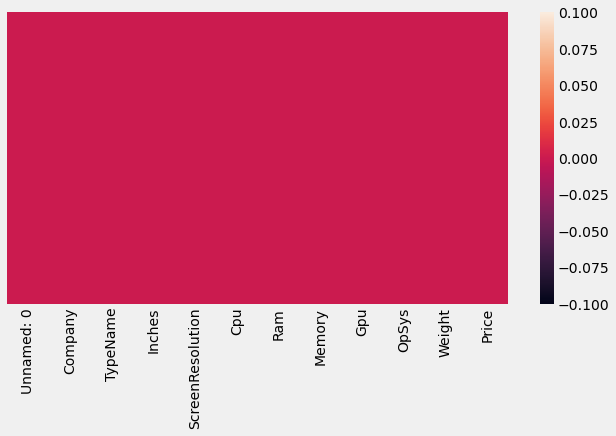

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False)

In [9]:
# From the dataframe "Unnamed: 0" seems to be of no use. So it is droped
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
# Removeing GB from "Ram" and Kg from "Weight"
df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df['Weight'].str.replace("kg","")

In [11]:
# Changing the data type of Ram and Weight to int32 and float32 respectively
df['Ram'] = df['Ram'].astype("int32")
df['Weight'] = df['Weight'].astype("float32")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### "Price"

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

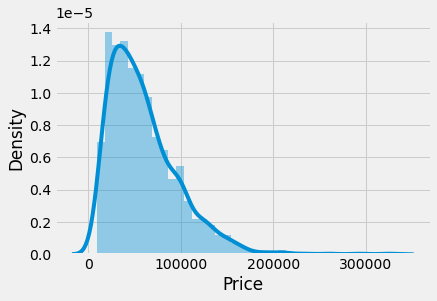

In [14]:
sns.distplot(df["Price"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

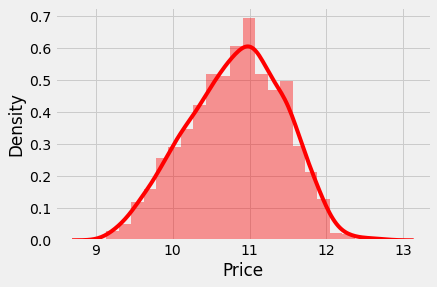

In [15]:
sns.distplot(np.log(df['Price']), color='red')

The Price feature is not normally distributed and so it has to be transformed, as transforming it gives a better normal distribution.

### "Company"

In [16]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Company', ylabel='count'>

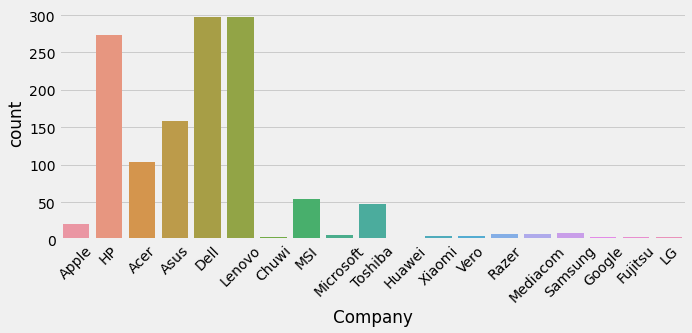

In [17]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
sns.countplot(df['Company'])

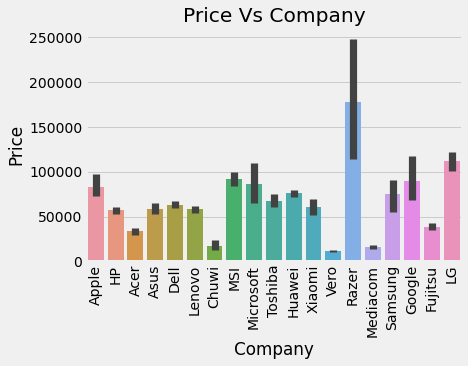

In [18]:
# Relation with Price
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title("Price Vs Company")
plt.show()

### "TypeName"

In [19]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TypeName', ylabel='count'>

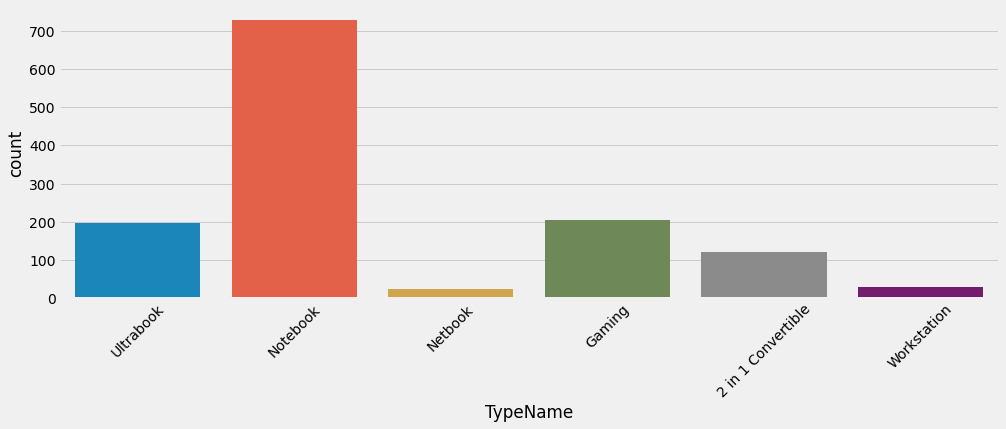

In [20]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.countplot(df['TypeName'])

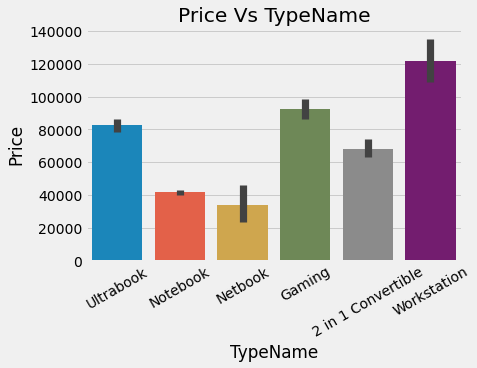

In [21]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.title("Price Vs TypeName")
plt.xticks(rotation='30')
plt.show()

### "Inches"

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Frequency'>

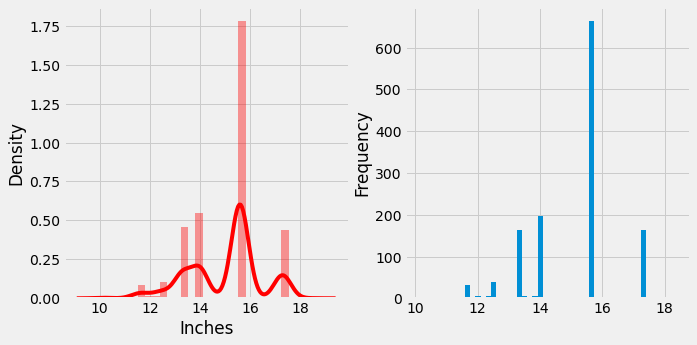

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['Inches'], color='red')

plt.subplot(1, 2, 2)
df['Inches'].plot.hist(bins = 50)


### ScreenResolution

In [23]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440               

In [24]:
# Here a new feature - "Touchscreen" is made from 'ScreenResolution'
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [26]:
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Touchscreen', ylabel='count'>

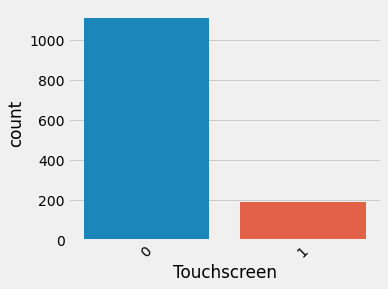

In [27]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=45)
sns.countplot(df['Touchscreen'])

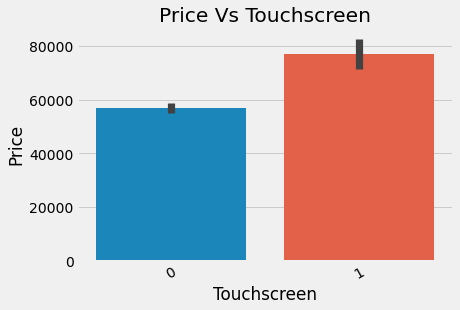

In [28]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.title("Price Vs Touchscreen")
plt.xticks(rotation='30')
plt.show()

In [29]:
# Another feature 'IPS' is created from ScreenResolution
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if "IPS" in x else 0 )
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [30]:
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS', ylabel='count'>

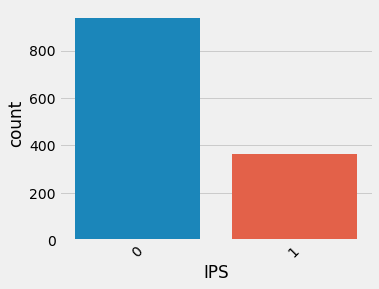

In [31]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=45)
sns.countplot(df['IPS'])

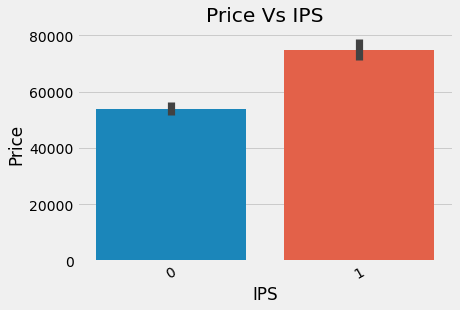

In [32]:
sns.barplot(x=df['IPS'],y=df['Price'])
plt.title("Price Vs IPS")
plt.xticks(rotation='30')
plt.show()

In [33]:
# Now from ScreenResolution, 2 more features have to be created as 'X_res' & 'Y_res'. Here the ScreenResolution feature 
# is split to create the 2 new axes.
newCell = df['ScreenResolution'].str.split("x",n=1,expand=True)

In [34]:
newCell.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [35]:
df['X_res'] = newCell[0]
df['Y_res'] = newCell[1]

In [36]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [37]:
df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: X_res, Length: 1303, dtype: object

In [38]:
df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: object

In [39]:
## Y_res feature is created. Now X_res feature has to be properly created and the digits has to be extracted.
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [40]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [41]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [43]:
## Finally, 4 features are created from the ScreenResolution feature - X_res, Y_res, IPS, Touchscreen. Hence, the
## ScreenResolution feature is represented in the 4 new featues and can be dropped, as below.
df.drop('ScreenResolution', axis=1, inplace=True)

In [44]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600


<AxesSubplot:>

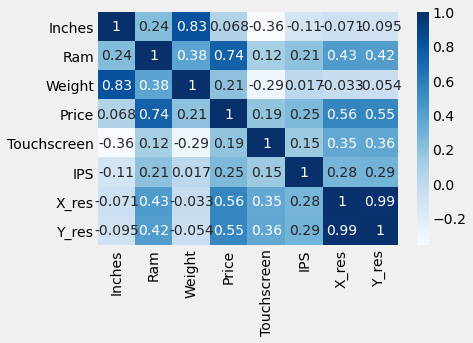

In [45]:
# Checking corelation
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [46]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

<AxesSubplot:>

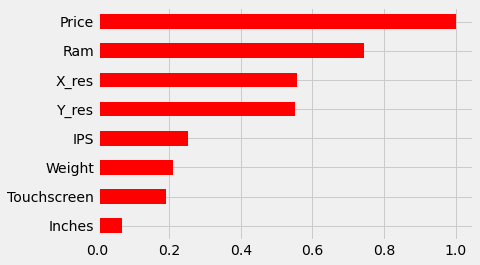

In [47]:
df.corr()['Price'].sort_values().plot.barh(color='red')

In [48]:
## X_res and Y_res has a high corellation with price. A new feature - "ppi" can be derived from X_res, Y_res & Inches.

df['ppi'] = ((((df['X_res'])**2) + ((df['Y_res'])**2))**0.5/df['Inches']).astype("float32")

In [49]:
df.head(2)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983002
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


<AxesSubplot:>

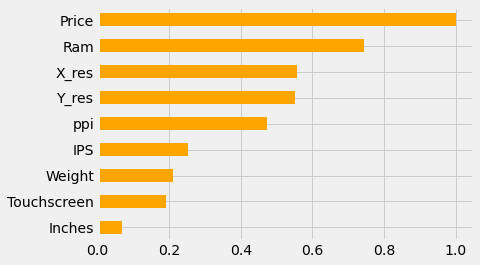

In [50]:
df.corr()['Price'].sort_values().plot.barh(color='orange')

In [51]:
## Since X_res, Y_res and Inches are explaining the correlation through the ppi feature, these 3 features are dropped
df.drop(columns=['X_res','Y_res','Inches'], axis=1, inplace=True)

In [52]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002


### Cpu 

In [53]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core M m3-7Y30 2.2GHz               1
Intel Pentium Dual Core 4405Y 1.5GHz      1
Intel Core M M7-6Y75 1.2GHz               1
AMD A4-Series 7210 2.2GHz                 1
Intel Core i3 6100U 2.1GHz                1
Name: Cpu, Length: 118, dtype: int64

In [54]:
## There seems to be many categories in the Cpu. Cpu Name feature is created

df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu, Length: 1303, dtype: object

In [55]:
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [56]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


In [57]:
## There seems to be many categories in the Cpu Name feature. 5 categories are made as follows:- 
# 1. Intel Core i5
# 2. Intel Core i3
# 3. Intel Core i7
# 4. Other Intel Processor
# 5. AMD Processor
# A new feature - "Cpu Brand" is made with the above mentioned categories.



In [58]:
def fetch_processor(var):
    if var == 'Intel Core i3' or var == 'Intel Core i5' or var == 'Intel Core i7':
        return var
    else:
        if var.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [59]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [60]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu Brand
843,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,2.18,38041.3872,0,0,100.454666,Intel Core i5,Intel Core i5
1165,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,79813.4400,0,0,282.424011,Intel Core i7,Intel Core i7
713,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15877.4400,0,0,157.350510,Intel Celeron Dual,Other Intel Processor
917,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,85194.7200,0,0,127.335678,Intel Core i7,Intel Core i7
816,Razer,Ultrabook,Intel Core i7 7500U 2.5GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.29,95850.7200,1,1,352.465149,Intel Core i7,Intel Core i7


In [61]:
df['Cpu Brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: Cpu Brand, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cpu Brand', ylabel='count'>

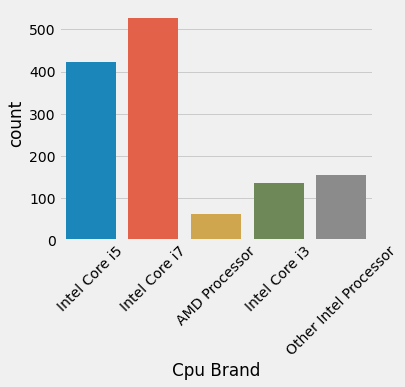

In [62]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=45)
sns.countplot(df['Cpu Brand'])

<AxesSubplot:title={'center':'Price Vs Cpu Brand'}, xlabel='Cpu Brand', ylabel='Price'>

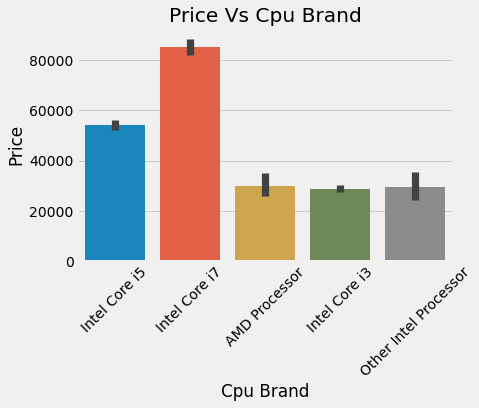

In [63]:
plt.figure()
plt.xticks(rotation=45)
plt.title("Price Vs Cpu Brand")
sns.barplot(data=df, x='Cpu Brand', y='Price')

In [64]:
## Cpu Brand represents Cpu & Cpu Name and so they are dropped
df.drop(columns=["Cpu", "Cpu Name"], axis=1, inplace=True)

In [65]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5


### Ram

In [66]:
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

<AxesSubplot:>

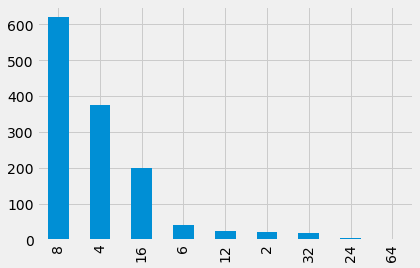

In [67]:
df['Ram'].value_counts().plot(kind='bar')

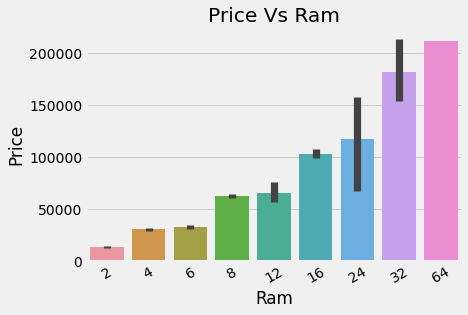

In [68]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.title("Price Vs Ram")
plt.xticks(rotation='30')
plt.show()

### Memory

In [69]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
240GB SSD                          1
1

In [70]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5


In [71]:
# df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
# df["Memory"] = df["Memory"].str.replace('GB', '')
# df["Memory"] = df["Memory"].str.replace('TB', '000')
# df["Memory"].str.split("+", n = 1, expand = True)

In [72]:
# new = df["Memory"].str.split("+", n = 1, expand = True)

In [73]:
# df["first"]= new[0]

In [74]:
# df["first"]=df["first"].str.strip()
# df["first"]

In [75]:
# df["first"].sample(5)

In [76]:
# df["second"]= new[1]

In [77]:
# df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
# df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
# df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
# df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [78]:
# df.head()

In [79]:
# df['first'] = df['first'].str.replace(r'\D', '')
# df['first']

In [80]:
# df["second"].fillna("0", inplace = True)
# df["second"]

In [81]:
# df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
# df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
# df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
# df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# df['second'] = df['second'].str.replace(r'\D', '')

In [82]:
# df["first"] = df["first"].astype(int) 
# df["second"] = df["second"].astype(int)

In [83]:
# df["first"].sample(5)

In [84]:
# df["second"].sample(5)

In [85]:
# df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
# df["HDD"]

In [86]:
# df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
# df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
# df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

# df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
#        'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
#        'Layer2Flash_Storage'],inplace=True)

In [87]:
# The 'Memory' feature has to be split into 4 new features - HDD, SDD, Hybrid & Flash_storage. 
# GB, and .0 are removed from Memory. TB is converted to thousands with 000.

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True) #Removes '.0'
df["Memory"] = df["Memory"].str.replace('GB', '')                      #Removes 'GB'
df["Memory"] = df["Memory"].str.replace('TB', '000')     #Removes "TB" and converts to 000 as unit.              
new = df["Memory"].str.split("+", n = 1, expand = True)  # Splits the Memory column on "+" to get 2 sets of memory

df["first"]= new[0]  # Assigning first split to df['first']
df["first"]=df["first"].str.strip()

df["second"]= new[1]   # Assigning first split to df['second']

## Now 4 new features as seen below are created from the newly created df['first']. If in df['first'] any of the 
## newfeatures is found then 1 is alloted to that feature. The 4 new features are named as "Layer1...." to imply 
## that it is from the df['first']. 
## Same logic is applied for df['second']

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

# Datatype of the two features as converted to int from str
df["first"] = df["first"].astype(int) 
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-87-5585e109ae09>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-87-5585e109ae09>:33: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [88]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
501,HP,Notebook,8,256 SSD,AMD Radeon 520,Windows 10,1.91,32979.7872,0,0,100.454666,Intel Core i5,0,256,0,0
153,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.80,100699.2000,0,0,127.335678,Intel Core i7,1000,256,0,0
166,Acer,Notebook,4,1000 HDD,Intel HD Graphics 505,Windows 10,2.10,19367.8128,0,0,100.454666,Other Intel Processor,1000,0,0,0
703,Lenovo,Notebook,4,1000 HDD + 1000 HDD,Intel HD Graphics 620,Windows 10,2.10,33110.8560,0,0,141.212006,Intel Core i5,2000,0,0,0
490,Lenovo,Notebook,8,256 SSD,Nvidia GeForce 940MX,Windows 10,2.30,53918.8272,0,1,141.212006,Intel Core i5,0,256,0,0


In [89]:
# Now the Memory column is dropped
df.drop(columns=['Memory'],inplace=True)

In [90]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128


In [91]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

<AxesSubplot:>

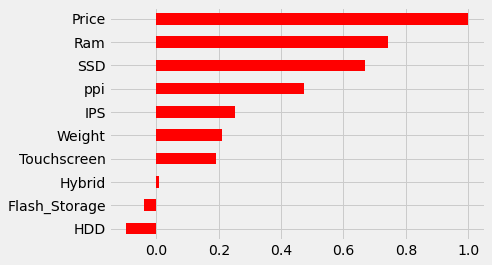

In [92]:
df.corr()['Price'].sort_values().plot.barh(color='red')

In [93]:
## Hybrid & Flash_Storage has -ve correlaton with Price. So they are dropped.
df.drop(columns=['Hybrid','Flash_Storage'], axis=1, inplace=True)

In [94]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0


### Gpu

In [95]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD FirePro W6150M           1
AMD Radeon R7 M360           1
Intel HD Graphics 540        1
Nvidia Quadro M500M          1
AMD Radeon 540               1
Name: Gpu, Length: 110, dtype: int64

In [96]:
## A new feature named Gpu Brand is made from Gpu feature.
df['Gpu Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [97]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

<AxesSubplot:>

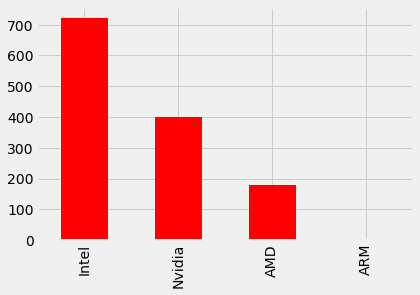

In [98]:
df['Gpu Brand'].value_counts().plot.bar(color='red')

In [99]:
## Since ARM has only 1 value, it is dropped.
df = df[df['Gpu Brand'] != 'ARM']

<AxesSubplot:>

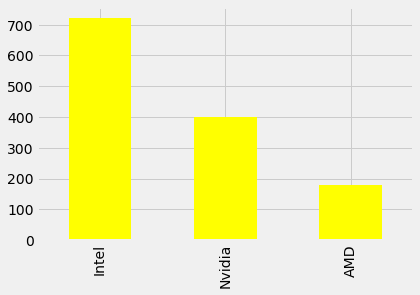

In [100]:
df['Gpu Brand'].value_counts().plot.bar(color='yellow')

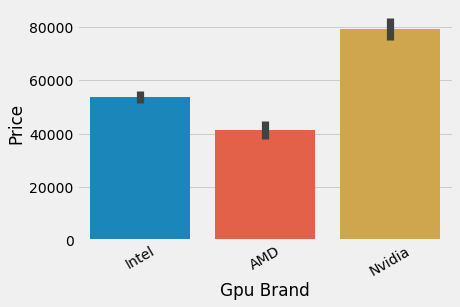

In [101]:
sns.barplot(x=df['Gpu Brand'],y=df['Price'])
plt.xticks(rotation='30')
plt.show()

In [102]:
# Gpu is dropped.
df.drop(columns=['Gpu'], axis=1, inplace=True)

In [103]:
df.sample(8)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand
495,Lenovo,Ultrabook,8,Windows 10,1.30,58554.72,0,1,125.367432,Intel Core i5,0,180,Intel
803,Dell,Notebook,8,Windows 10,2.06,93186.72,1,0,282.424011,Intel Core i5,0,256,Nvidia
571,HP,Notebook,8,Windows 10,1.94,20725.92,0,0,111.935204,Other Intel Processor,2000,0,Intel
740,Dell,Notebook,8,Windows 10,2.00,64308.96,0,0,141.212006,Intel Core i7,1000,128,Nvidia
859,Lenovo,Notebook,4,No OS,2.20,24988.32,0,0,141.212006,Intel Core i3,1000,0,Intel
1153,Dell,Gaming,8,Windows 10,2.62,63882.72,0,0,141.212006,Intel Core i7,1000,0,Nvidia
1275,Asus,Ultrabook,8,Windows 10,1.20,38841.12,0,1,165.632111,Other Intel Processor,0,512,Intel
1273,HP,Notebook,6,Windows 10,2.19,40705.92,0,0,100.454666,Intel Core i7,1000,0,AMD


### OpSys

In [104]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [105]:
## 3 new categories are made from OpSys feature - Windows, Mac and Others

def catg_os(dt):
    if dt == 'Windows 10' or dt == 'Windows 7' or dt == 'Windows 10 S':
        return 'Windows'
    else:
        if dt == 'macOS' or dt == 'Mac OS X':
            return 'Mac'
        else:
            return "Others"

In [106]:
df['OS'] = df['OpSys'].apply(catg_os)

In [107]:
df.drop(columns=['OpSys'],inplace=True)

In [108]:
df.sample(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
153,MSI,Gaming,16,2.80,100699.20,0,0,127.335678,Intel Core i7,1000,256,Nvidia,Windows
560,Acer,2 in 1 Convertible,4,1.25,18594.72,1,1,189.905792,Other Intel Processor,0,0,Intel,Windows
430,Samsung,Netbook,4,1.15,14332.32,0,0,135.094208,Other Intel Processor,0,0,Intel,Others
940,HP,Gaming,8,2.75,74538.72,0,1,127.335678,Intel Core i5,1000,128,Nvidia,Windows
159,Toshiba,Notebook,4,2.10,23816.16,0,0,100.454666,Intel Core i3,500,0,Intel,Windows
644,Acer,Notebook,4,2.40,23976.00,0,0,100.454666,Intel Core i3,500,0,Intel,Windows
389,Lenovo,2 in 1 Convertible,16,1.42,133679.52,1,0,209.800690,Intel Core i7,0,512,Intel,Windows
763,Asus,Ultrabook,8,1.20,60153.12,0,1,276.053528,Intel Core i5,0,256,Intel,Windows
698,Toshiba,Ultrabook,16,1.36,100006.56,1,0,165.632111,Intel Core i7,0,512,Intel,Windows
786,MSI,Gaming,8,2.20,58021.92,0,0,141.212006,Intel Core i5,1000,128,Nvidia,Windows


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OS', ylabel='count'>

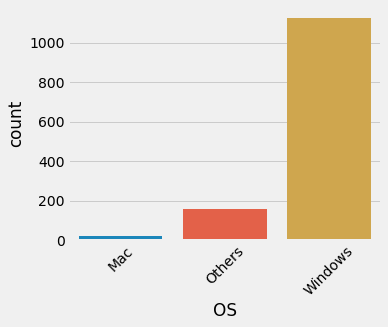

In [109]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=45)
sns.countplot(df['OS'])

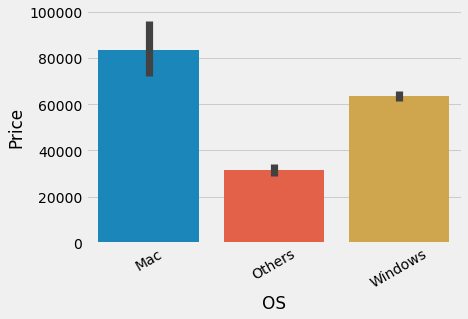

In [110]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='30')
plt.show()

### Weight

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

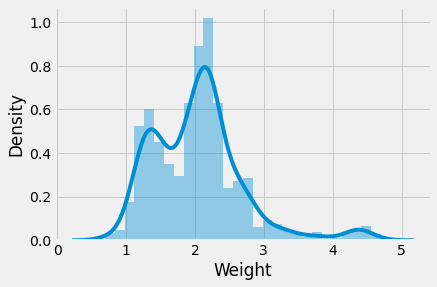

In [111]:
sns.distplot(df['Weight'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

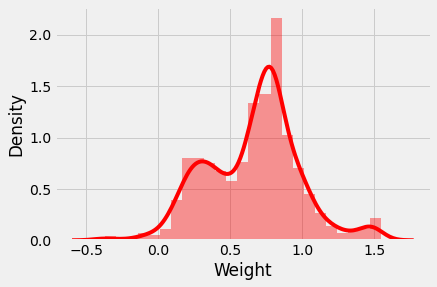

In [112]:
sns.distplot(np.log(df['Weight']), color='red')

In [113]:
## Log transforming the Weight feature will give a better normal distribution. So Weight will be log transformed.

<AxesSubplot:xlabel='Weight', ylabel='Price'>

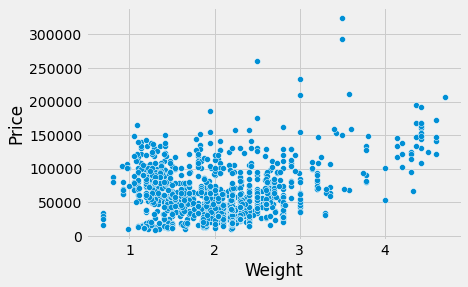

In [114]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [115]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

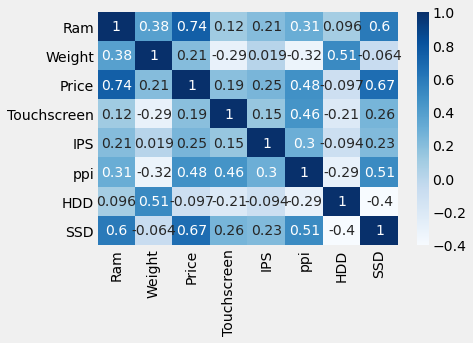

In [116]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [117]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


### Model Building

In [118]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [119]:
X.shape, y.shape

((1302, 12), (1302,))

In [120]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983002,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.212006,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.534622,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983002,Intel Core i5,0,256,Intel,Mac


In [121]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
X_train.shape, y_train.shape

((1041, 12), (1041,))

In [124]:
X_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
147,Asus,Notebook,4,2.00,0,0,141.212006,Other Intel Processor,1000,0,Intel,Windows
342,HP,Notebook,8,2.10,0,1,141.212006,Intel Core i3,1000,0,Nvidia,Windows
1003,HP,Notebook,4,1.64,0,0,111.935204,Intel Core i5,500,0,Intel,Windows
814,Dell,Notebook,8,2.18,0,0,141.212006,Intel Core i5,0,256,AMD,Windows
344,Dell,Ultrabook,8,1.20,0,0,165.632111,Intel Core i7,0,256,Intel,Windows


In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 147 to 1126
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1041 non-null   object 
 1   TypeName     1041 non-null   object 
 2   Ram          1041 non-null   int32  
 3   Weight       1041 non-null   float32
 4   Touchscreen  1041 non-null   int64  
 5   IPS          1041 non-null   int64  
 6   ppi          1041 non-null   float32
 7   Cpu Brand    1041 non-null   object 
 8   HDD          1041 non-null   int64  
 9   SSD          1041 non-null   int64  
 10  Gpu Brand    1041 non-null   object 
 11  OS           1041 non-null   object 
dtypes: float32(2), int32(1), int64(4), object(5)
memory usage: 93.5+ KB


### Linear Regression

In [126]:
## Defining the ColumnTransformer
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11]),
    ('log_transform', FunctionTransformer(np.log), [3])
], remainder="passthrough")

step2 = LinearRegression()

## Creating Pipeline

lr_pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

lr_pipe.fit(X_train,y_train)

y_pred = lr_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8077958050021274
MAE 0.21489883576488764


### Ridge Regression

In [127]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11]),
    ('log_transform', FunctionTransformer(np.log), [3])
], remainder="passthrough")

step2 = Ridge(alpha=10)

pipe_RLReg = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_RLReg.fit(X_train,y_train)

y_pred = pipe_RLReg.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8015936011527292
MAE 0.22002313241750687


### Lasso Regression

In [128]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11]),
    ('log_transform', FunctionTransformer(np.log), [3])
], remainder="passthrough")

step2 = Lasso(alpha=0.001)

las_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

las_pipe.fit(X_train,y_train)

y_pred = las_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8064389377215555
MAE 0.21672739369346933


### KNN

In [129]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11]),
    ('log_transform', FunctionTransformer(np.log), [3])
], remainder="passthrough")
step2 = KNeighborsRegressor(n_neighbors=3)

KNN_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

KNN_pipe.fit(X_train,y_train)

y_pred = KNN_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7621296452817405
MAE 0.2282838583411259


### Decision Tree

In [130]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11]),
    ('log_transform', FunctionTransformer(np.log), [3])
], remainder="passthrough")

step2 = DecisionTreeRegressor(max_depth=8)

dt_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

dt_pipe.fit(X_train,y_train)

y_pred = dt_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8328421625527302
MAE 0.19361623924964744


### SVM

In [131]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11]),
    ('log_transform', FunctionTransformer(np.log), [3])
], remainder="passthrough")

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

svm_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

svm_pipe.fit(X_train,y_train)

y_pred = svm_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8236669639000267
MAE 0.19751859056340837


### Random Forest

In [132]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11]),
    ('log_transform', FunctionTransformer(np.log), [3])
], remainder="passthrough")
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

rf_pipe.fit(X_train,y_train)

y_pred = rf_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8631850905866674
MAE 0.1745732752186827


### ExtraTrees

In [133]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11]),
    ('log_transform', FunctionTransformer(np.log), [3])
], remainder="passthrough")

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

et_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

et_pipe.fit(X_train,y_train)

y_pred = et_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8729629162192869
MAE 0.16731563968475655


### AdaBoost

In [134]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11]),
    ('log_transform', FunctionTransformer(np.log), [3])
], remainder="passthrough")

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7556668282692403
MAE 0.25551692005851906


### XgBoost

In [135]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11]),
    ('log_transform', FunctionTransformer(np.log), [3])
], remainder="passthrough")

XGBR = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

XGBR_pipe = Pipeline([
    ('step1',step1),
    ('step2',XGBR)
])

XGBR_pipe.fit(X_train,y_train)

y_pred = XGBR_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8820102476654132
MAE 0.16300952342611796
